<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 4: SALES PREDICTION OF DIFFERENT PRODUCTS

MADE BY: CHITRARTH VASDEV

DOMAIN: DATA SCIENCE

MODEL USED: LINEAR REGRESSION

LANGUAGE : PYTHON

Model Coefficients:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043
Intercept: 4.7141

Model Evaluation:
Mean Squared Error: 2.91
R² Score: 0.9059


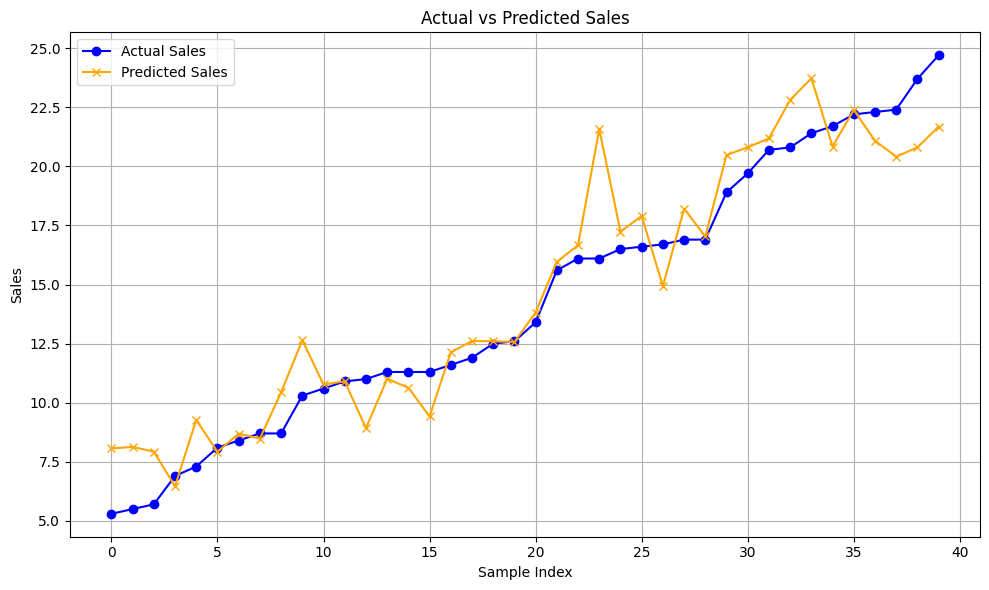

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/advertising.csv")

# Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model coefficients
print("Model Coefficients:")
print(f"TV: {model.coef_[0]:.4f}")
print(f"Radio: {model.coef_[1]:.4f}")
print(f"Newspaper: {model.coef_[2]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualization: Actual vs Predicted
import seaborn as sns
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df = results_df.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual Sales', color='blue', marker='o')
plt.plot(results_df['Predicted'], label='Predicted Sales', color='orange', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


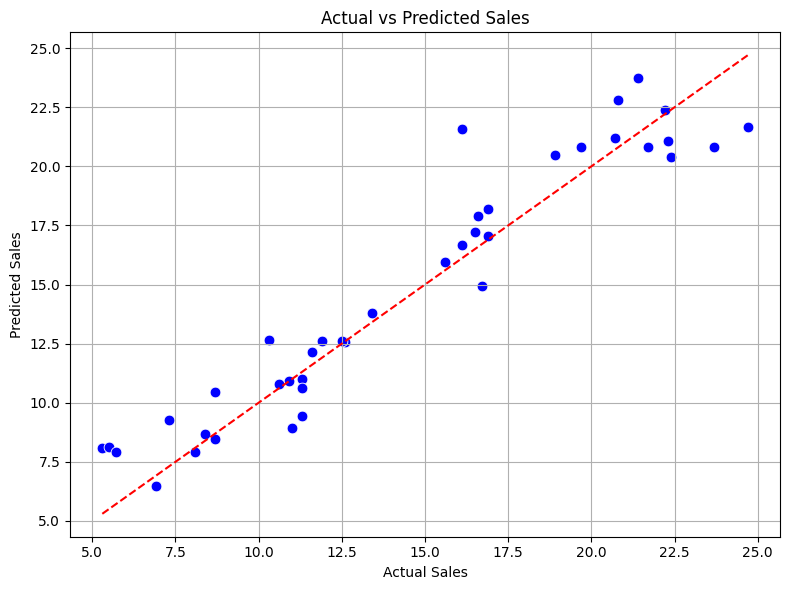

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are from the earlier model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


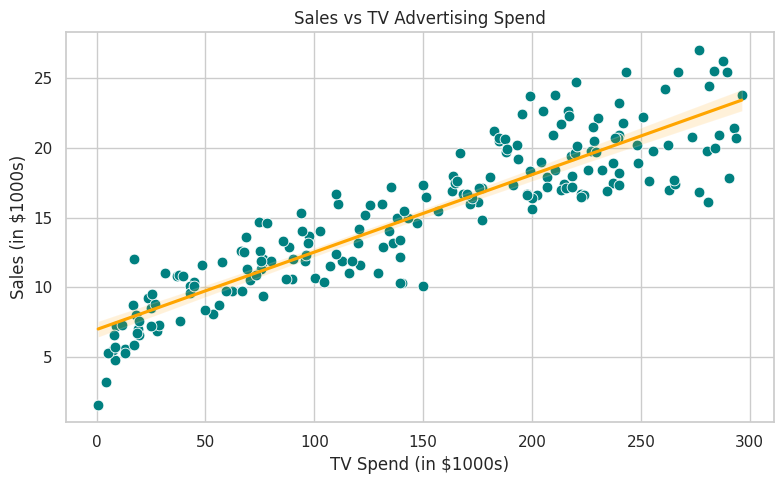

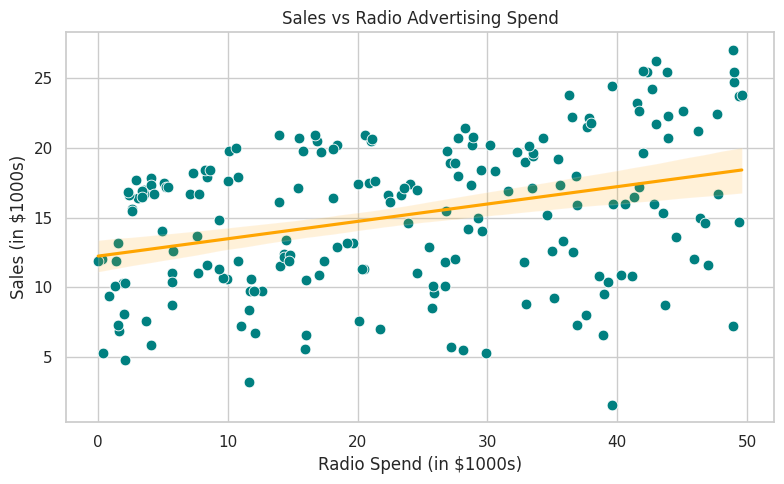

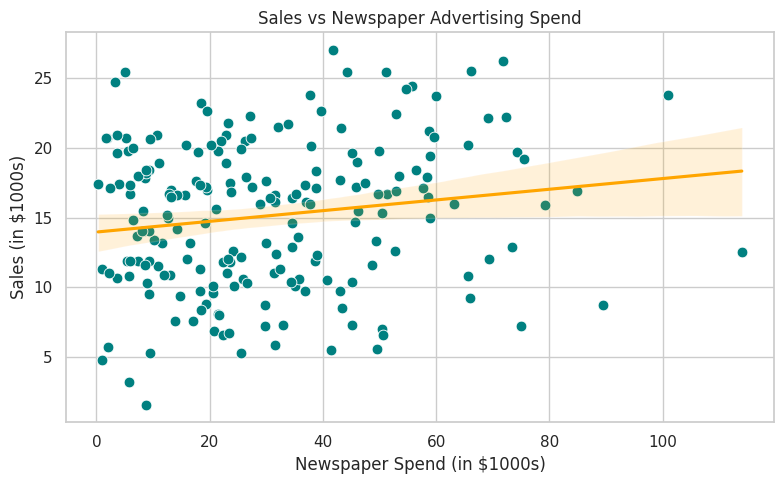

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/advertising.csv")

# Set up the plot style
sns.set(style="whitegrid")

# List of channels
channels = ['TV', 'Radio', 'Newspaper']

# Create separate plots for each channel
for channel in channels:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=channel, y='Sales', data=df, color='teal', s=60)
    sns.regplot(x=channel, y='Sales', data=df, scatter=False, color='orange')  # Optional regression line
    plt.title(f'Sales vs {channel} Advertising Spend')
    plt.xlabel(f'{channel} Spend (in $1000s)')
    plt.ylabel('Sales (in $1000s)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
